### 安裝套件

In [ ]:
#!pip install tensorflow==1.14
#!pip install torch
#!pip install torchvision
#!pip install opencv-python

### 匯入套件與函數

In [1]:
from matting import matting_result
from deeplabv3plus import deeplabv3plus
from trimap import trimap
import numpy as np

matting model loading


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 



deeplabv3+ model loading


### segmentation

In [2]:
result_segmentation = deeplabv3plus('06.jpg')
#result_segmentation = deeplabv3plus('04.jpg')
#result_segmentation = deeplabv3plus('http://i.epochtimes.com/assets/uploads/2016/06/PO_X5716_meitu_1-450x300.jpg',
#                                    website = True)

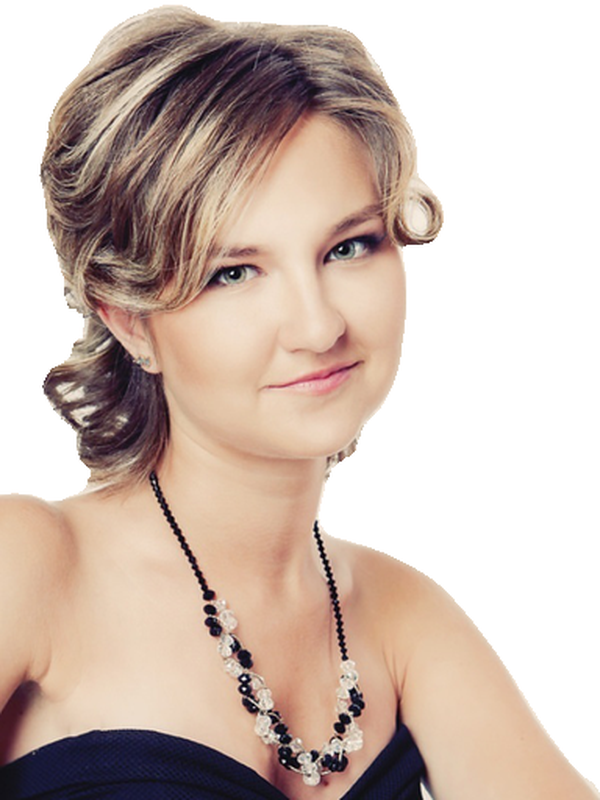

In [3]:
# 0:segmentation的結果
result_segmentation[0]

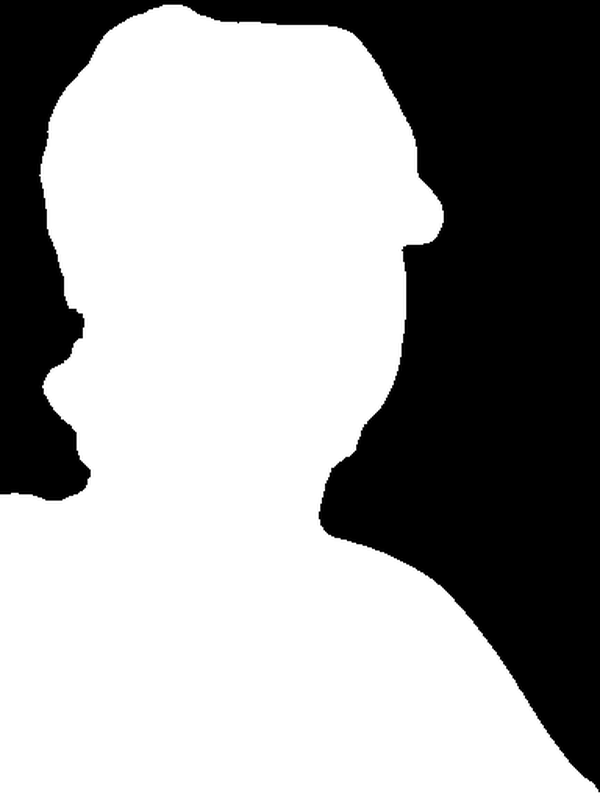

In [4]:
# 1:segmentation產生的mask
result_segmentation[1]

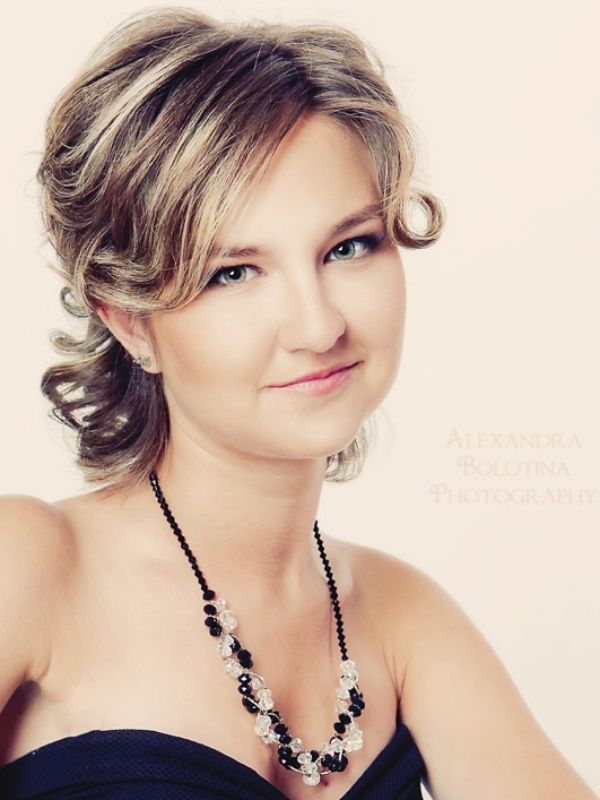

In [5]:
# 2:原圖
result_segmentation[2]

### trimap

In [6]:
# 將segmentation產生的mask依內縮與外擴的單位，生成trimap圖
# erosion內縮單位 size 外擴單位
result_trimap = trimap(image = np.array(result_segmentation[1]), 
                       size = 30, 
                       erosion = 10)

generate trimap(size: 30, erosion: 10)


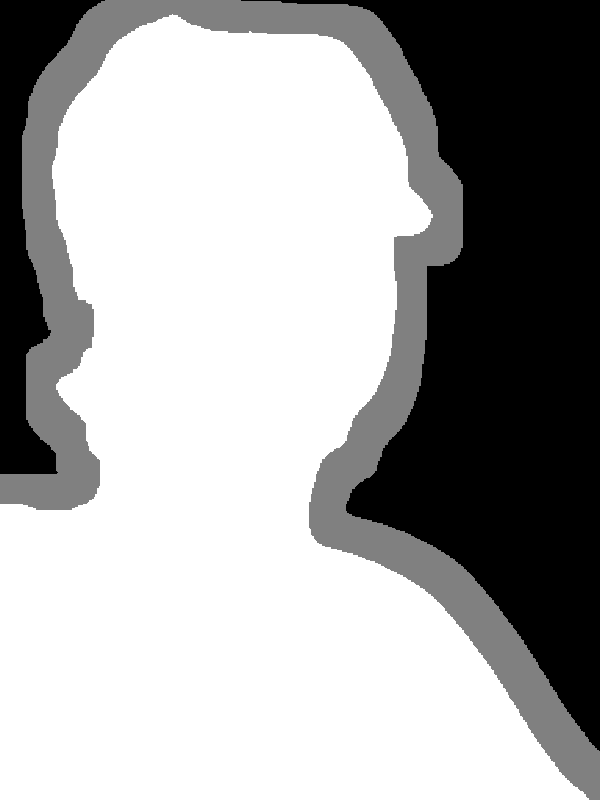

In [7]:
result_trimap

### matting

In [8]:
# 利用原圖與trimap圖產生matting結果
result_matting = matting_result(pic_input = result_segmentation[2], 
                                tri_input = result_trimap)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1351: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


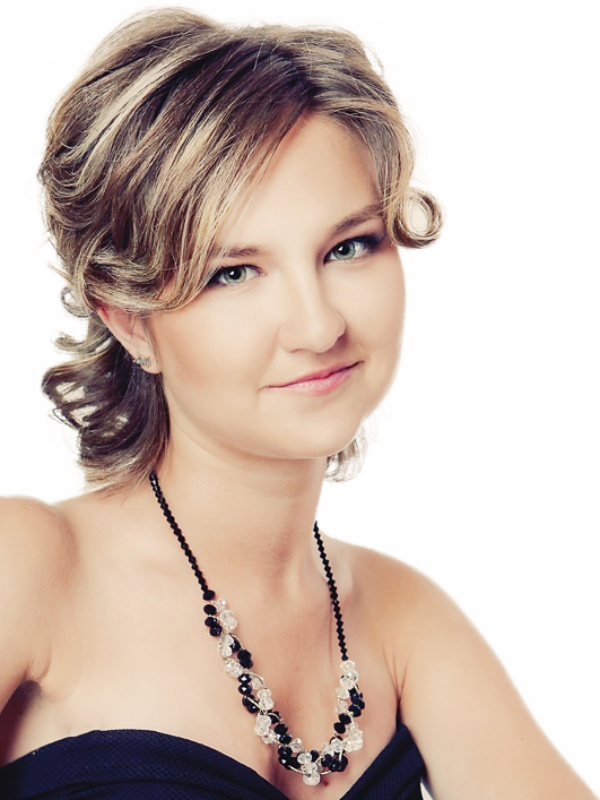

In [9]:
result_matting

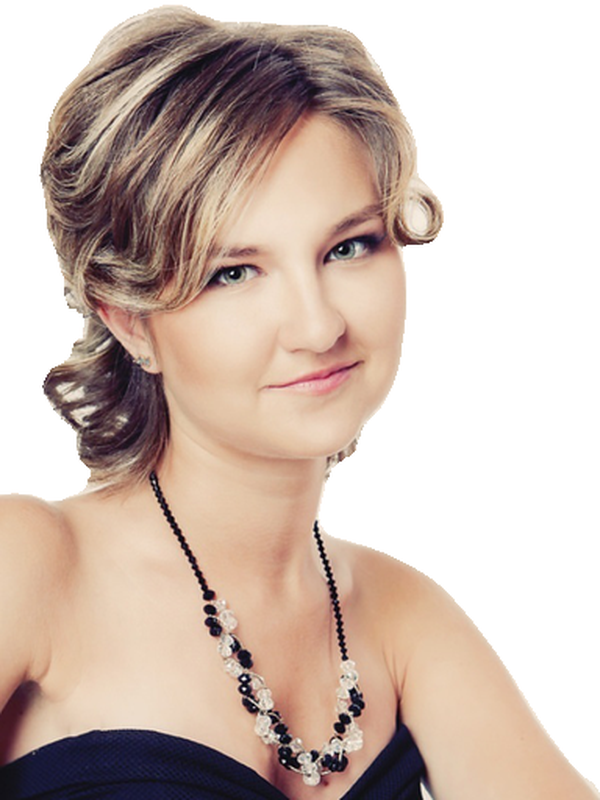

In [10]:
result_segmentation[0]

### another trimap

generate trimap(size: 50, erosion: 30)


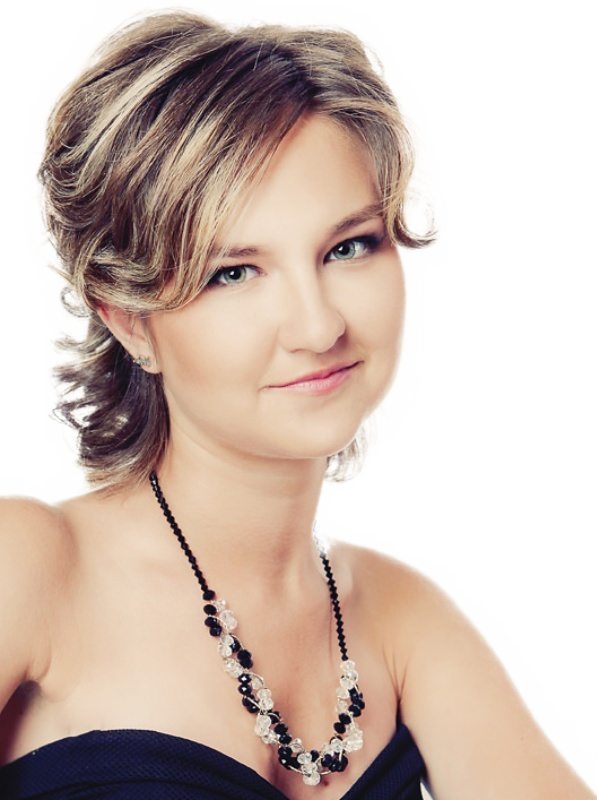

In [11]:
result_trimap_50_30 = trimap(image = np.array(result_segmentation[1]), 
                             size = 50, 
                             erosion = 30)
result_matting_50_30 = matting_result(pic_input = result_segmentation[2], 
                                      tri_input = result_trimap_50_30)
result_matting_50_30